# Data Plotting - Matplotlib

Matplotlib is an extensive plotting library for the python language which allows for creating simple but also very fancy, nice looking plots. Matplotlib allows for creating two or three dimensional plots, that can be saved in many formats (e.g. png, pdf, svg). If you read a recently published scientific journal paper it will with a very high probability contain plots generated with Matplotlib. 

Matplotlib has extensive documentation and a lot of tutorials online. You could start by having at a look to its [gallery](https://matplotlib.org/stable/gallery/).

`pyplot` is a module within Matplotlib that contains the functions that handle the creation of figures, plots as the modification of plot properties such as axis. Therefore it is common practice that Matplotlib is not directly used for plotting, but rather its submodules like `matplotlib.pyplot`.

In [1]:
# Let's get started by import the Matplotlib library
import matplotlib.pyplot as plt

We will be utilizing numpy and pandas to import some example climate data which we will use to create plots.

In [2]:
import pandas as pd
import numpy as np

In [3]:
## Data Sources (modified for the lecture):
# German Weather Service: https://opendata.dwd.de/climate_environment/CDC/regional_averages_DE/annual/
# ERA5 Data: https://cds.climate.copernicus.eu/ - ERA5 - Surface Data - 2m temperature and u100, v100
# OSTIA Data: http://ghrsst-pp.metoffice.com/ostia-website/

# Time Series
ol_era5_all = pd.read_csv("data/ERA5_Oldenburg_1979-2019.csv",index_col=0)      # ERA-5 climate data for Oldenburg
ol_era5_avg = pd.read_csv("data/ERA5_Oldenburg_1979-2019_yavg.csv",index_col=0) # ERA-5 yearly averaged climate data for Oldenburg
lowsax_clim = pd.read_csv("data/DWD_LowerSaxony_ClimateAvg.csv",index_col=0)    # Lower Saxony climate data

# 2D data for northern hemisphere (nh)
nh_ice19 = np.loadtxt("data/ice19.txt")    
nh_ice89 = np.loadtxt("data/ice89.txt")
lon = np.loadtxt("data/lon.txt")
lat = np.loadtxt("data/lat.txt")

We will not use the whole dataset for the plots, but only certain parameters, which will be assigned in separate variables as lists.

In [4]:
lowsax_year = lowsax_clim.index.tolist()
lowsax_summer = lowsax_clim.summer_days.values.tolist()
lowsax_ice = lowsax_clim.ice_days.values.tolist()
lowsax_temperature = lowsax_clim.t2_mean.values.tolist()
lowsax_sund = lowsax_clim.sunshine_duration.values.tolist()

Now let's create our first plot, which will be a line plot. A line plot is great for visualizing trends or patterns over time.

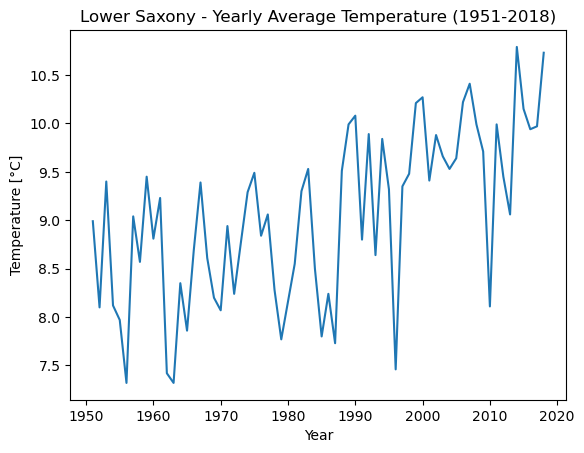

In [5]:
# Line Plot
plt.plot(lowsax_year, lowsax_temperature)                          # here we state the x and y variables of our plot
plt.xlabel("Year")                                                 # adding a label to the x-axis, with a string
plt.ylabel("Temperature [°C]")                                     # adding a label to the y-axis, with a string
plt.title("Lower Saxony - Yearly Average Temperature (1951-2018)") # adding a title to the plot, with a string
plt.show()                                                         # calling the .show() function so that the plot is displayed

Matplotlib has an extensive number of different plotting style. Two of the most common are `.plot()`, which as we saw creates line plots and `.scatter()`.

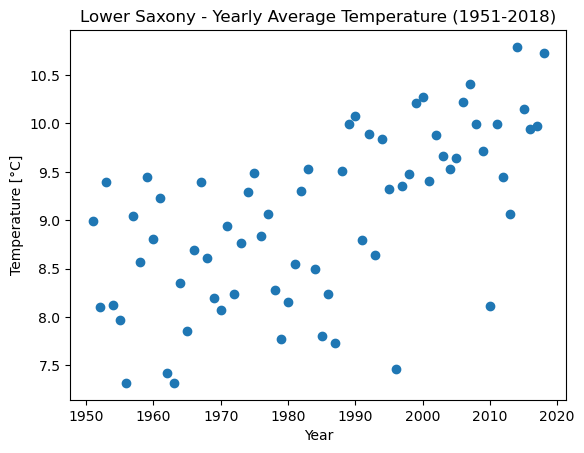

In [6]:
# Scatter Plots
plt.scatter(lowsax_year, lowsax_temperature)
plt.xlabel("Year")
plt.ylabel("Temperature [°C]")
plt.title("Lower Saxony - Yearly Average Temperature (1951-2018)")
plt.show()

Choosing the proper plot stye is important, because because the goal of plotting is to clarify data, present results, and effectively communicate findings. However, improper plotting can lead to confusion or misinterpretation of the results, therefore care and consideration should also be placed towards the plots that you create.

In the following we will present the basic operation you can perform with Matplotlib, how to costumize your plots and some of the most common plot types.

## Procedural and object-oriented plotting

There is a non-object oriented and an object-oriented way of creating plots. The non-object oriented way looks more easy and intuitive in the first place and is the one used in the previous cells. 

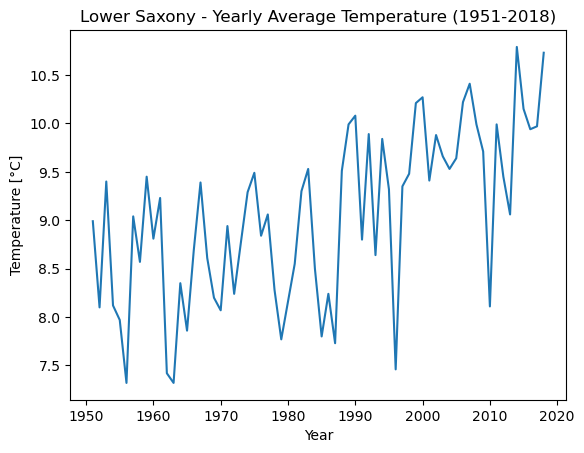

In [7]:
# Non-object oriented plot
plt.figure()
plt.plot(lowsax_year,lowsax_temperature)
plt.xlabel("Year")
plt.ylabel("Temperature [°C]")
plt.title("Lower Saxony - Yearly Average Temperature (1951-2018)")
plt.show()

However, there is another way of creating plots that follows object-oriented programming conventions. In this case the plots are created as objects of the `matplotlib.pyplot.subplots` class.

The procedure for creating the plots is similar, but the syntax (e.g. axis labels `.set_xlabel()` vs. `.xlabel()`) is different.

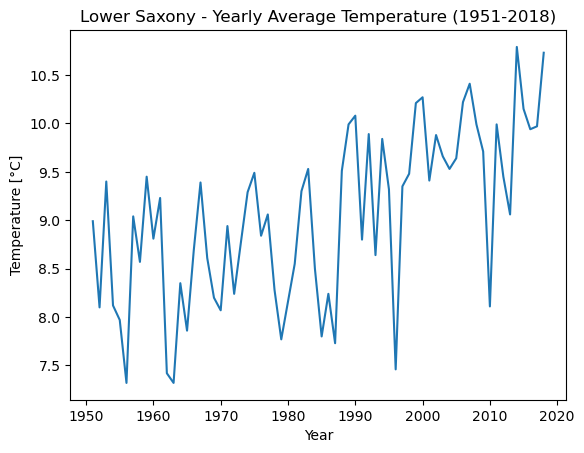

In [8]:
# Object oriented way of plotting
fig, ax = plt.subplots() # Function that returns tuple of figur and axes object
ax.plot(lowsax_year,lowsax_temperature)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
plt.show()

Both methods have produced two plots that look exactly the same. We strongly recommend that you learn and use the object-oriented approach. It offers much more flexibility and is often required in more complex cases. It also becomes more intuitive as you become more familiar with it. For this reason, we are going to focus on the object-oriented approach in the following.

## Figure Properties 

You may not always be happy with the plot style that Matplotlib provides by default. Fortunately, the properties of a plot are easy to access and modify. 

In the following we will look at some of the properties of a plot that you can modify. There are two main types of changes you can make: **global properties**, which affect the whole plot, and **local properties**, which affect specific elements of your plot. 

### Global Figure Properties 

The global properties are typically modified in your figure object. One of the first properties you can state is your figure dimensions:

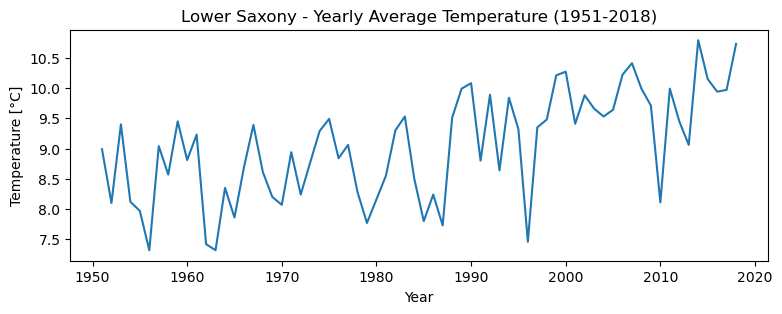

In [9]:
fig, ax = plt.subplots(figsize=(9,3)) # Widht and height of figure
ax.plot(lowsax_year,lowsax_temperature)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
plt.show()

You can choose to save a plot you create as a figure in different formats (e.g. png, pdf, svg). This is another figure property:

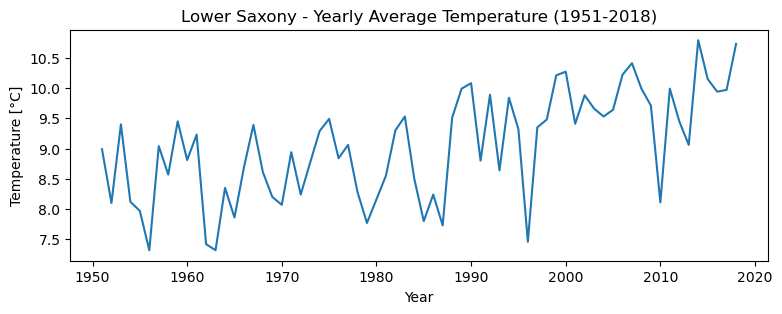

In [10]:
fig, ax = plt.subplots(figsize=(9, 3)) 
ax.plot(lowsax_year,lowsax_temperature)
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
fig.savefig("first_figure.png")     # saving figure as .png in your current directory
plt.show()

In one figure we can have more than one plot:

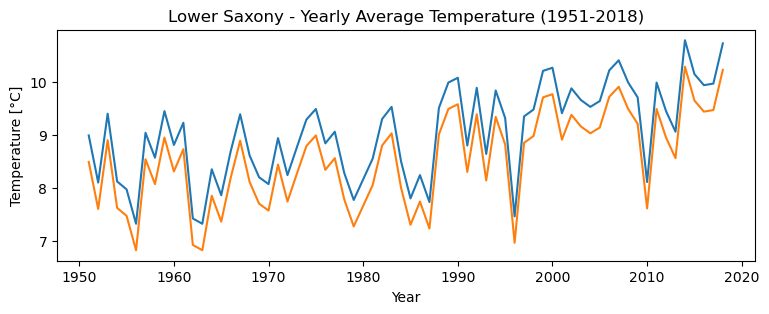

In [11]:
fig, ax = plt.subplots(figsize=(9, 3)) 
ax.plot(lowsax_year,lowsax_temperature)
ax.plot(lowsax_year,[i-0.5 for i in lowsax_temperature])
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
fig.savefig("first_figure.png")     # saving figure again, with the same name, so the last version will be overwritten
plt.show()

If you look at the figure that has just been saved you can notice how there is white space around the plot. The white space can be eliminated using the *bbox_inches* argument of the `.savefig()` function:

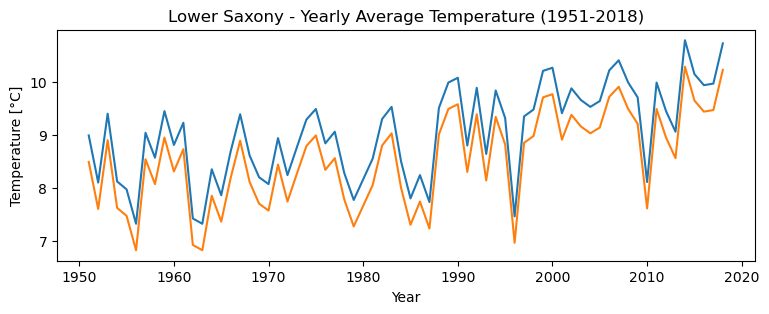

In [12]:
fig, ax = plt.subplots(figsize=(9, 3)) 
ax.plot(lowsax_year,lowsax_temperature)
ax.plot(lowsax_year,[i-0.5 for i in lowsax_temperature])
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
fig.savefig("figure_no_white_space.png", bbox_inches="tight")     # bbox_inches="tight" reduces the white space around the figure
plt.show()

Additionally, you can specify the quality of the figure with the `dpi`(dots per inch) argument of the same `.savefig()` function:

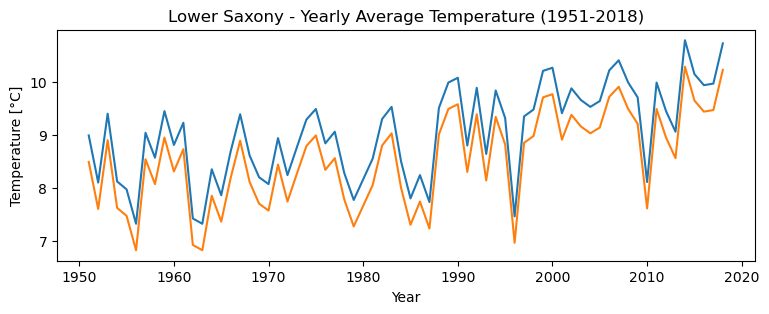

In [13]:
fig, ax = plt.subplots(figsize=(9, 3)) 
ax.plot(lowsax_year,lowsax_temperature)
ax.plot(lowsax_year,[i-0.5 for i in lowsax_temperature])
ax.set_xlabel("Year")
ax.set_ylabel("Temperature [°C]")
ax.set_title("Lower Saxony - Yearly Average Temperature (1951-2018)")
fig.savefig("figure.png", bbox_inches="tight", dpi=600)     # dpi sets the resolution (quality) of the image, note that the higher the resolution, the larger the image.                         
plt.show()                                                                 

### Local Figure Properties 

As mentioned above, *local properties* include features that affect specific elements of a plot. One such property is the line style of a plot.

Linestyles can either be changed by shortcuts: 
    
`b` for a blue solid line (`k`=black, `r`=red, `-.`= dash dotted etc.) 
    
Or you can modify them using function arguments like `color`, `linestyle`.

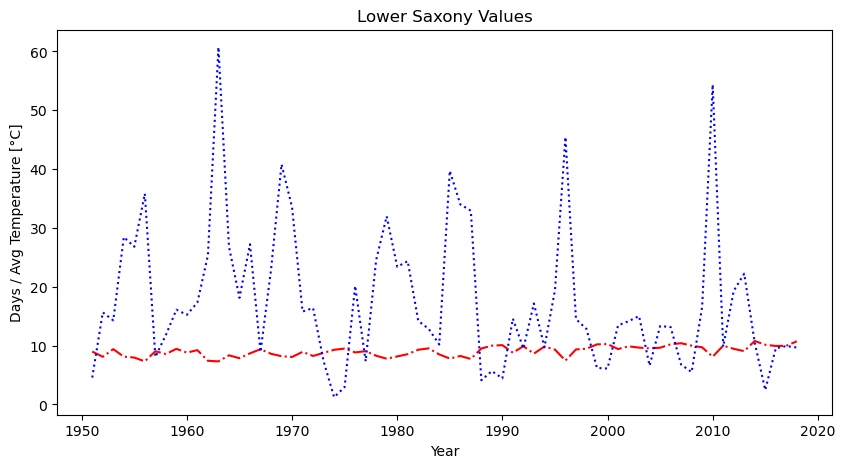

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lowsax_year, lowsax_temperature, 'r-.')                      # setting linestyle with shortcut
ax.plot(lowsax_year, lowsax_ice, color="blue", linestyle="dotted")   # setting line color and linestyle with function arguments
ax.set_xlabel("Year" )
ax.set_ylabel("Days / Avg Temperature [°C]")
ax.set_title("Lower Saxony Values")
plt.show()

An additional argument to your plot is the plot labels, which generally contains text, given as a string, or an f-string. To be able to see the labels the `legend()` function needs to be called. 

Labels or texts in figures can contain latex notations, font sizes or different font families:

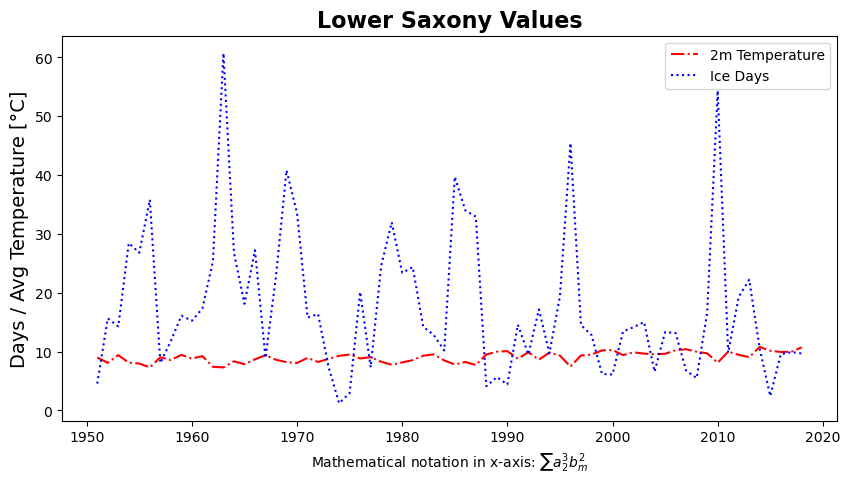

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lowsax_year,lowsax_temperature,'r-.', label="2m Temperature")
ax.plot(lowsax_year,lowsax_ice,color="blue",linestyle="dotted", label="Ice Days")
ax.set_xlabel("Mathematical notation in x-axis: $ \\sum a_2^3 b_m^2$" ) # Latex notation possible. Note the double backslash.
ax.set_ylabel("Days / Avg Temperature [°C]", fontsize=14)
ax.set_title("Lower Saxony Values", fontsize=16, fontweight = 'bold') # Changed Font
ax.legend()  #ax.legend(loc='center') #ax.legend(loc='upper right')
plt.show()

It is possible to set limits to your x and y axis:

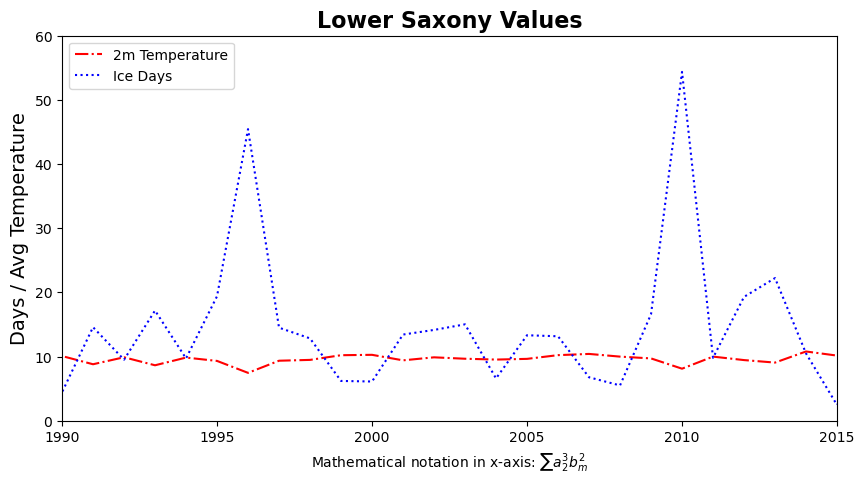

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lowsax_year,lowsax_temperature,'r-.', label="2m Temperature")
ax.plot(lowsax_year,lowsax_ice,color="blue",linestyle="dotted", label="Ice Days")
ax.set_xlabel("Mathematical notation in x-axis: $\\sum a_2^3 b_m^2$" ) #
ax.set_ylabel("Days / Avg Temperature", fontsize=14)
ax.set_title("Lower Saxony Values", fontsize=16, fontweight = 'bold') 
ax.legend()  
ax.set_xlim(1990, 2015) # limiting to specific years
ax.set_ylim(0, 60)      # limiting y axis
plt.show()

Error bars are a common practice in science. With Matplotlib, adding error bars to your plots is simple and customizable just as any other plot element:

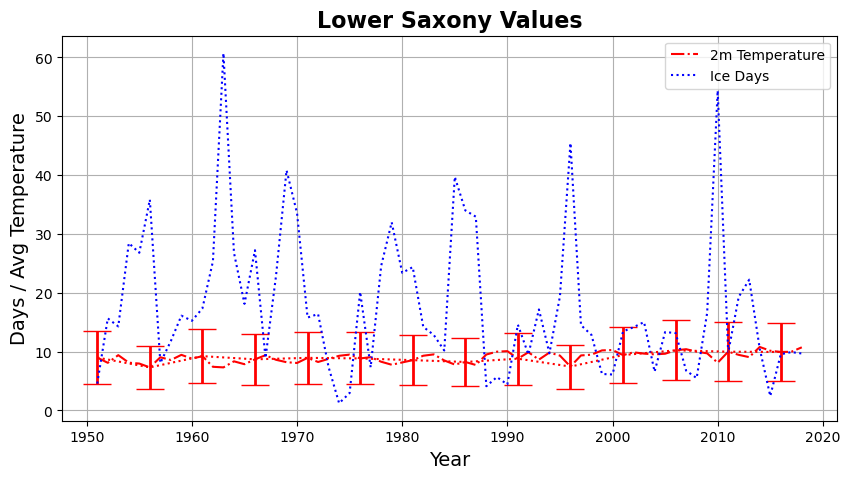

In [17]:
# Calculate error 
err=[i*0.5 for i in lowsax_temperature] # mock error value calculation as 1/2 of the temperature value

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lowsax_year,lowsax_temperature, 'r-.', label="2m Temperature")
ax.errorbar(lowsax_year[::5], lowsax_temperature[::5], yerr=err[::5], color="red", linestyle="dotted", capsize=10, elinewidth=2) # error for every 5 years

ax.plot(lowsax_year,lowsax_ice, color="blue", linestyle="dotted", label="Ice Days")

ax.set_xlabel("Year", fontsize=14)
ax.set_ylabel("Days / Avg Temperature", fontsize=14)
ax.set_title("Lower Saxony Values",fontsize=16, fontweight = 'bold') 
ax.legend()
ax.grid() # Add a grid

plt.show()

## Common Plot Types 

Until now, we have primarily explored line and scatter plots, but there's a wide range of other visualization options available to us.

### Plot types for time series and statistics

In science and engineering, particularly in our data-driven world, it is common to work with statistics, and the main datasets you will come across of are either time series or derived from time series. Dealing with datasets will be the subject of a future lecture, here we will focus on useful plot styles for presenting statistical results or time series data.

The plot types that will be discussed are:
- Bar plots
- Histograms
- Polar Plots
- Color value plots

**Bar plots** represent the distribution of data in certain catagories. They are mostly useful for comparing categories or subgroups.  

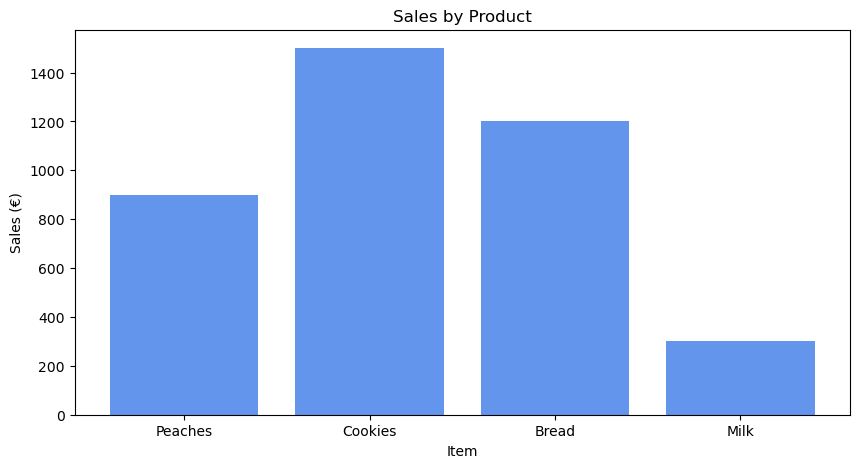

In [18]:
# Data for bar plot
items = ['Peaches', 'Cookies', 'Bread', 'Milk']
sales = [900, 1500, 1200, 300]

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(items, sales, color='#6495ED')

ax.set_title('Sales by Product')
ax.set_xlabel('Item')
ax.set_ylabel('Sales (€)')

plt.show()

**Histograms** are another type of plot that uses bars. However, histograms are used to show the distribution of the data. 

A histogram can show the probability density function of a dataset. This is often used in wind energy to assess the wind potential of a site.

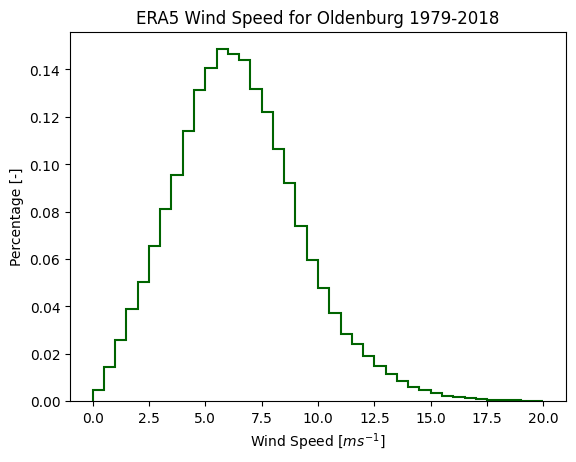

In [19]:
fig,ax=plt.subplots()
# In Wind Energy applications, it is common standard to use bins of 0.5 m/s
ax.hist(ol_era5_all.ws100, bins=40, range=(0,20), color="darkgreen", linewidth = 1.5, density=True, histtype='step')
ax.set_ylabel("Percentage [-]")
ax.set_xlabel("Wind Speed $[ms^{-1}]$")
ax.set_title("ERA5 Wind Speed for Oldenburg 1979-2018")
plt.show()

Or it can present the cumulative density function:

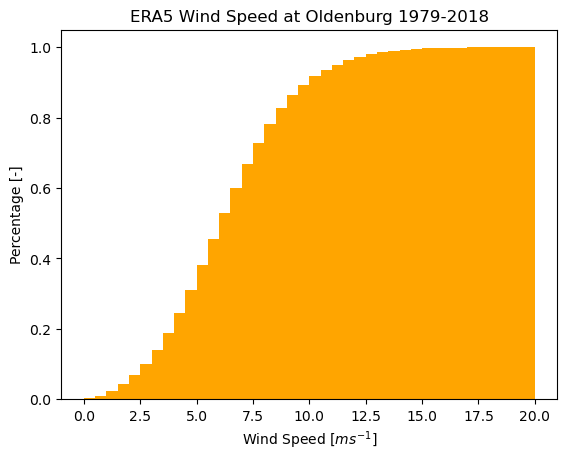

In [19]:
fig,ax=plt.subplots()
ax.hist(ol_era5_all.ws100, bins=40, range=(0,20), color="orange", cumulative=True, density=True)
ax.set_ylabel("Percentage [-]")
ax.set_xlabel("Wind Speed $[ms^{-1}]$")
ax.set_title("ERA5 Wind Speed at Oldenburg 1979-2018")
plt.show()

The polar coordinate system is used in many applications, so it is often useful to be able to create **polar plots**. It should be noted that the polar plots in Matplotlib work with radians. In cases where you have data in degrees, it needs to be transformed into radians, which can be done using functions from `numpy`.

Below is an example of a polar plot used to create a wind rose. First we create mock data for the wind direction and speed, afterwards we create the plot.

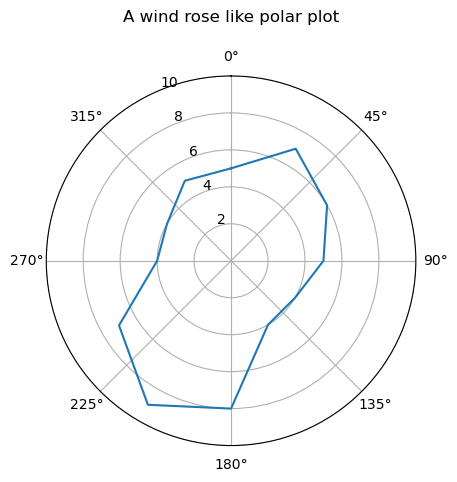

In [20]:
# Data
wd=[0,30,60,90,120,150,180,210,240,270,300,330,360]   # [m/s]
ws=[5, 7,6 ,5 ,4  ,4  ,8  ,9  ,7  ,4  ,4 , 5, 5]      # [°]
wdrad= [np.deg2rad(i) for i in wd]                    # converting degrees to radians

# Plor plot
ax = plt.subplot(projection='polar')   # to creat a polar plot you set the projection to 'polar'
ax.plot(wdrad, ws)
ax.set_rmax(10.0)
ax.set_theta_zero_location("N")        # setting the 0° angle to start North
ax.set_theta_direction(-1)
#ax.set_rticks([0.5, 1, 1.5, 3.0])     # less radial ticks
ax.set_rlabel_position(-22.5)          # get radial labels away from plotted line
ax.grid(True)
ax.set_title("A wind rose like polar plot", pad=20) # with pad you can shift the title  up 
plt.show()

**Color point by value** includes plots that use color maps to represent patterns and correlations between the variables. For these plots where color coding is used, we need to use the function `matplotlib.pyplot.get_cmap()`.


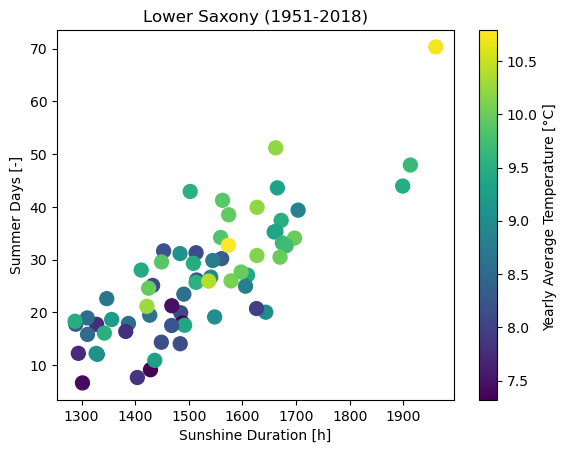

In [21]:
# Color Points by Values

cmap = plt.get_cmap('viridis')

fig,ax = plt.subplots()

im=ax.scatter(lowsax_sund, lowsax_summer, c=lowsax_temperature, s=100, cmap=cmap)

ax.set_xlabel("Sunshine Duration [h]")
ax.set_ylabel("Summer Days [-]")
ax.set_title("Lower Saxony (1951-2018)")
fig.colorbar(im, ax=ax, label="Yearly Average Temperature [°C] ")
plt.show()

### *2D* plots

Matplotlib is not limited to one dimensional plots but also well suited for plotting multi-dimensional data. There are several options for plotting two-dimensional data: 

- *imshow* - follows conventions used in image processing (origin in top left order) and assumes that all data elements in your array are to be rendered at the same size (e.g. like an image where all pixels have the same size)
- *pcolormesh* - a much faster and more flexible version of pcolor (so forget about ~~*pcolor*~~) that in contrast to imshow associates elements of the data array with rectangular elements whose size may vary over the rectangular grid.
- *contour* - calculates and plots contour lines
- *contourf* - calculates and plots filled contour

This is by far not an exhaustive list. For instance complex specialised python libraies for plotting geodata (e.g. maps) exist. However, with the above mentioned methods we can generate maps as well.

In [22]:
# We have some 2D arrays to look into
print(nh_ice19.shape)
print(nh_ice89.shape)

print(f'Longitude length: {lon.shape} and Latitude length: {lat.shape}')

(599, 7200)
(599, 7200)
Longitude length: (7200,) and Latitude length: (599,)


**Imshow** creates plots from 2-dimensional arrays. The plots will have one colored square for each element of the array. The color of each square is determined by the value of the corresponding array element and color code of the chosen color map.

In the following example we can see the sea ice fraction (the fractional coverage of a grid cell with sea ice) for a specific day in 2019. 

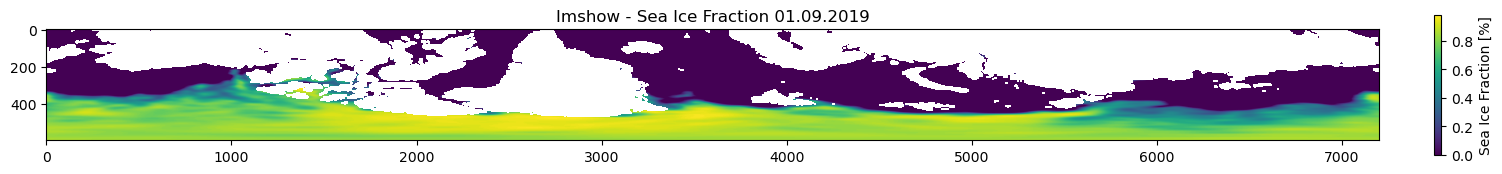

In [23]:
# Imshow
fig, ax = plt.subplots(figsize=(18, 500))
im = ax.imshow(nh_ice19, cmap="viridis") 
ax.set_title("Imshow - Sea Ice Fraction 01.09.2019")

# Add a Color bar to the right of the plot
fig.colorbar(im, ax=ax, label="Sea Ice Fraction [%]", fraction=0.005, pad=0.04)
plt.show()

The **imshow** plots assume that each grid cell coming from the array has the same size. **pcolormesh** is a similar plot, which allows the user to specify values for the x and y axis. This enables the creation of grid cells of varying sizes, allowing for non-uniform grid spacing.

In the following plot, we will utilize the same data for the ice fraction, however we will be adding the longitude and latitude information, which will change the axis of our plot:

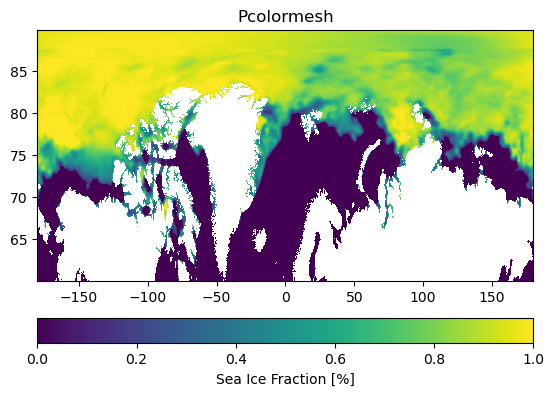

In [24]:
# pcolormesh
fig, ax = plt.subplots()

im = ax.pcolormesh(lon,lat,nh_ice89,cmap='viridis',shading="auto") 
ax.set_title('Pcolormesh')
ax.set_aspect('auto') #'equal'
fig.colorbar(im, ax=ax, label="Sea Ice Fraction [%]", fraction=0.22, pad=0.1, orientation="horizontal")
plt.show()

To better understand the **pcolormesh**, we can utilize a simple example of a random grid. You may notice that in the example below we are using `np.random.seed(42)`. This is a method call that allows you to generate random values, when you specify the seed the numbers won't change after you rerun your code, ensuring that your results are reproducible. 

In [25]:
# Let's get some 2-dimensional data: 
np.random.seed(42)         
Z = np.random.rand(6, 10)  

# Generate values for x and y axis that are equally spaced
x=[0,2,4,6,8,10,12,14,16,18,20] # one more value than the number of columns in Z because we want to plot the edges
y=[0,3,6,9,12,15,18]

Taking the randomly generated data and the unevenly spaced x and y axis values, we can use **pcolormesh** to create a grid that displays the z data according to the grid spacing.

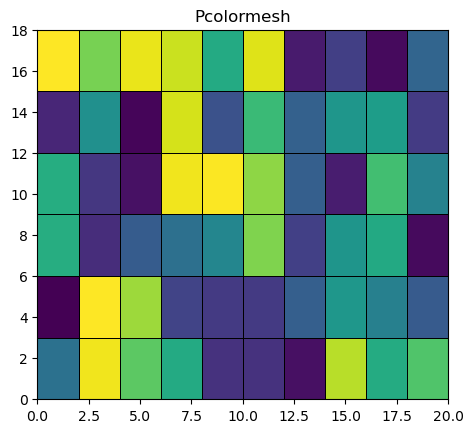

In [26]:
# Plot with pcolormesh
fig, ax = plt.subplots()
ax.pcolormesh(x, y, Z, edgecolors="k", linewidth=0.5, shading="auto")  # Better linewidth
ax.set_title('Pcolormesh')
ax.set_aspect('equal')
plt.show()

Use `contour()` and `contourf()` to create contour lines and filled contour areas.

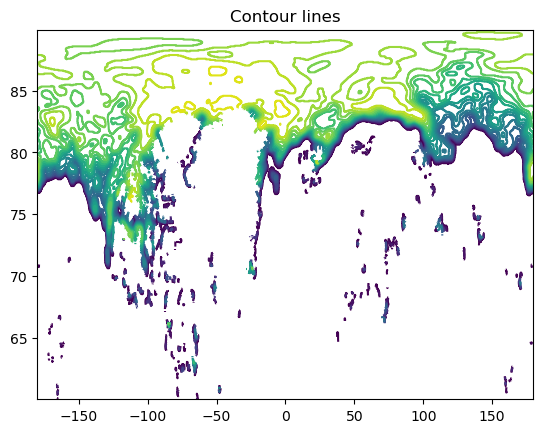

In [27]:
# Contour lines
fig, ax = plt.subplots()
ax.contour(lon,lat,nh_ice19,20)  # 20 is the number of contour lines (levels)
ax.set_title("Contour lines")
plt.show()

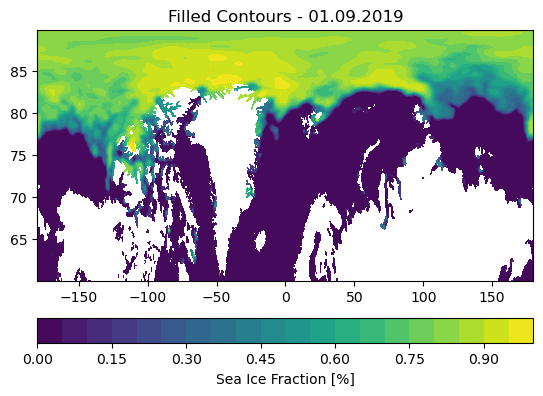

In [28]:
# Filled Contour areas
fig, ax = plt.subplots()
im=ax.contourf(lon,lat,nh_ice19,20)
fig.colorbar(im, ax=ax, label="Sea Ice Fraction [%]", fraction=0.22, pad=0.1, orientation="horizontal")
ax.set_title("Filled Contours - 01.09.2019")
plt.show()

## Subplots 

In many cases you may want to have several plots in a figure. Maplotlib provides an easy way to combine multiple plots into panels. You specify the number of plots you want in a figure when you create your figure object. This means that subplotting is only possible using the object-oriented method of plotting. 

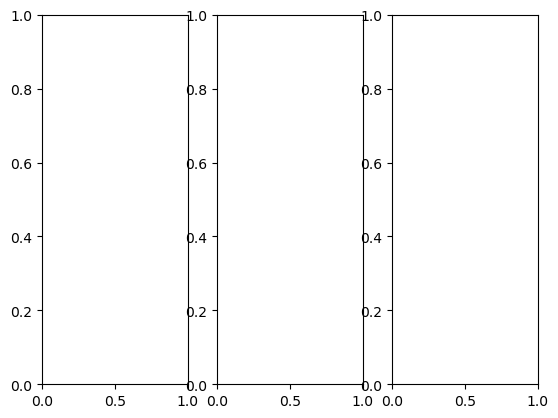

In [30]:
fig1, axs = plt.subplots(1,3) # stating you want 3 plots in 3 columns
plt.show()

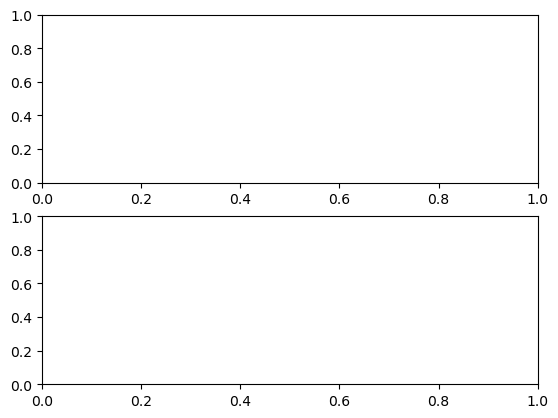

In [31]:
fig2, axs = plt.subplots(2,1) # stating you want 2 plots in 2 rows
plt.show()

For each subplot you create, you can set the features individually, as local parameters. The order of the plots is the same as for arrays.

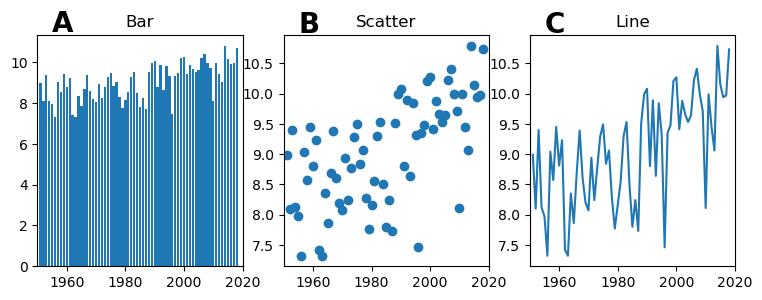

In [32]:
fig,axs = plt.subplots(1, 3, figsize=(9,3)) 

axs[0].bar(lowsax_year,lowsax_temperature)
axs[0].set_xlim([1950,2020])
axs[0].set_title('Bar')

axs[1].scatter(lowsax_year,lowsax_temperature)
axs[1].set_xlim([1950,2020])
axs[1].set_title('Scatter')

axs[2].plot(lowsax_year,lowsax_temperature)
axs[2].set_xlim([1950,2020])
axs[2].set_title('Line')

axs[0].text(1955, 11.5, "A", size=20, weight='bold')
axs[1].text(1955, 11, "B", size=20, weight='bold')
axs[2].text(1955, 11, "C", size=20, weight='bold')

plt.show()

It is possible to set features that all the subplots can share. Such feature can be:
- A main title for the figure
- Sharing x or y axis
- Text, etc.

Sharing axis is defined as an argument when the image is created.

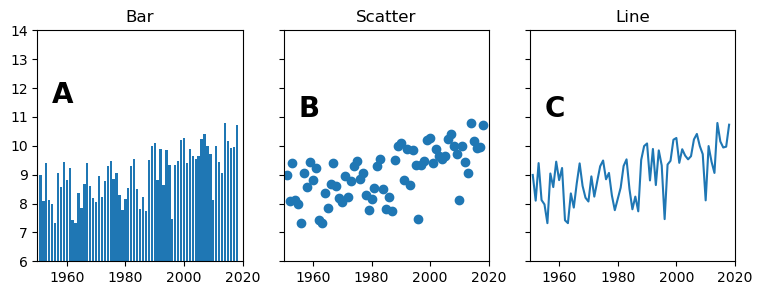

In [33]:
fig,axs = plt.subplots(1, 3, figsize=(9,3),sharey=True) # With sharey=True we switch on axis sharing for y 

axs[0].bar(lowsax_year,lowsax_temperature)
axs[0].set_xlim([1950,2020])
axs[0].set_title('Bar')
axs[0].set_ylim([6,14]) # Need to modify only once because it's shared

axs[1].scatter(lowsax_year,lowsax_temperature)
axs[1].set_xlim([1950,2020])
axs[1].set_title('Scatter')

axs[2].plot(lowsax_year,lowsax_temperature)
axs[2].set_xlim([1950,2020])
axs[2].set_title('Line')

axs[0].text(1955, 11.5, "A", size=20, weight='bold')
axs[1].text(1955, 11, "B", size=20, weight='bold')
axs[2].text(1955, 11, "C", size=20, weight='bold')

plt.show()

Similarly, we can create plots that share the x axis:

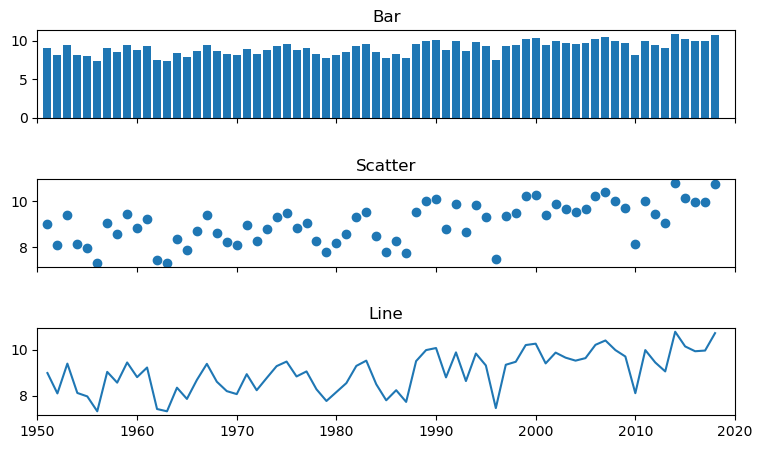

In [34]:
fig,axs = plt.subplots(3, 1, figsize=(9,5), sharex=True) # With sharey=True we switch on axis sharing for y 

axs[0].bar(lowsax_year,lowsax_temperature)
axs[0].set_xlim([1950,2020])         # Need to modify only once because it's shared
axs[0].set_title('Bar')

axs[1].scatter(lowsax_year,lowsax_temperature) 
axs[1].set_title('Scatter')

axs[2].plot(lowsax_year,lowsax_temperature) 
axs[2].set_title('Line')

plt.subplots_adjust(hspace=0.7)  # Adding horizontal space between the plots

plt.show()

A title for the figure can be set as well:

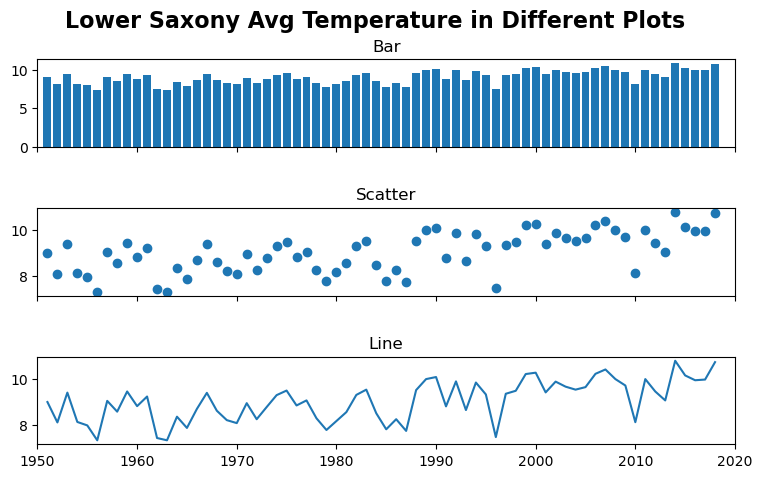

In [35]:
fig,axs = plt.subplots(3, 1, figsize=(9, 5), sharex=True) # With sharey=True we switch on axis sharing for y 

axs[0].bar(lowsax_year,lowsax_temperature)
axs[0].set_xlim([1950,2020])         # Need to modify only once because it's shared
axs[0].set_title('Bar')

axs[1].scatter(lowsax_year,lowsax_temperature) 
axs[1].set_title('Scatter')

axs[2].plot(lowsax_year,lowsax_temperature) 
axs[2].set_title('Line')

plt.subplots_adjust(hspace=0.7)  # Adding horizontal space between the plots

# Add a common title
fig.suptitle('Lower Saxony Avg Temperature in Different Plots', fontsize=16, fontweight = 'bold')

plt.show()

## Additional Plots

Let's explore more advanced plots that give deeper insights into the data.

#### Heatmap

A heatmap helps visualize the correlation matrix between numerical variables. Here, we can check the correlation between the temperature, the ice days and sunshine days.

To asiest way to calculate the correlation, would be through pandas, therefore we need to combine the data into a DataFrame:

In [44]:
df = pd.DataFrame({
    "Year": lowsax_year,
    "IceDays": lowsax_ice,
    "Temperature": lowsax_temperature,
    "Sunshine": lowsax_sund
})
df

,Year,IceDays,Temperature,Sunshine
0,1951,4.57,8.99,1643.4
1,1952,15.65,8.10,1484.9
2,1953,14.28,9.40,1609.5
3,1954,28.44,8.12,1483.9
4,1955,26.80,7.97,1626.2
...,...,...,...,...
63,2014,10.49,10.79,1573.7
64,2015,2.45,10.15,1627.0
65,2016,9.55,9.94,1574.3
66,2017,9.92,9.97,1425.0


Now that we have the data in the format we want, we calcualte the correlation matrix and plot the results with `imshow()`:

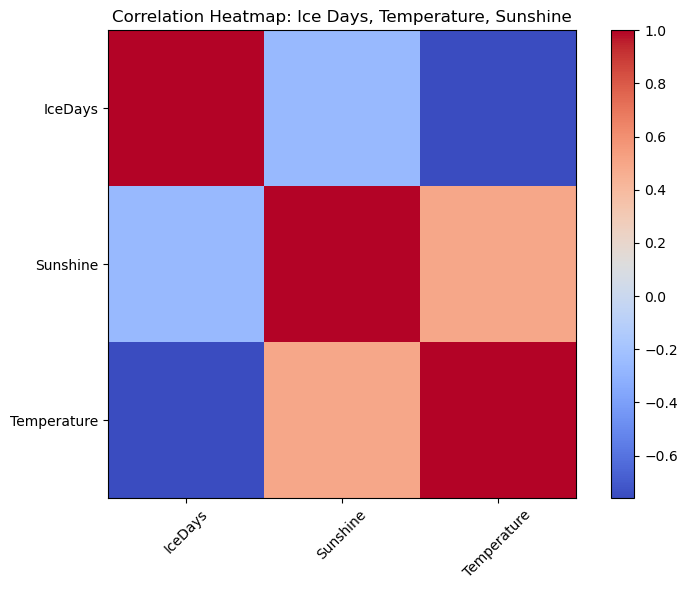

In [51]:
# Calculate the correlation matrix
corr_matrix = df[["IceDays", "Sunshine", "Temperature"]].corr()

# Plotting heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')

# Add colorbar
plt.colorbar()

# Set appropriate tick labels
plt.xticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(np.arange(len(corr_matrix.columns)), corr_matrix.columns)

plt.title("Correlation Heatmap: Ice Days, Temperature, Sunshine")

plt.tight_layout()
plt.show()

### Stacked Bar and Area Plots

Stacked bar plots and area plots allow you to show cumulative values across categories or time periods.

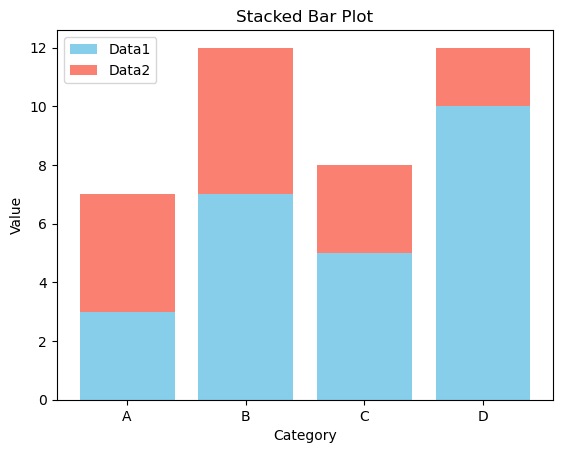

In [53]:
# Sample data
categories = ['A', 'B', 'C', 'D']
data1 = [3, 7, 5, 10]
data2 = [4, 5, 3, 2]

plt.bar(categories, data1, label='Data1', color='skyblue')
plt.bar(categories, data2, bottom=data1, label='Data2', color='salmon')

plt.title('Stacked Bar Plot')
plt.xlabel('Category')
plt.ylabel('Value')
plt.legend()
plt.show()

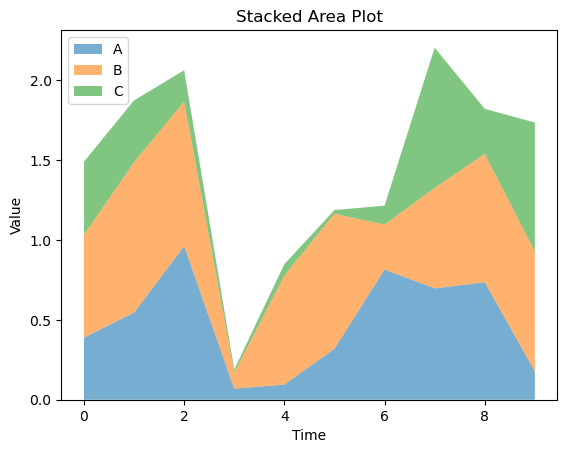

In [54]:
# Sample random data
data = np.random.rand(10, 3)

plt.stackplot(range(10), data.T, labels=['A', 'B', 'C'], alpha=0.6)
plt.title('Stacked Area Plot')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend(loc='upper left')
plt.show()

#### *3D* Plots

For more complex datasets, 3D visualizations can help to visualize relationships between three continuous variables.

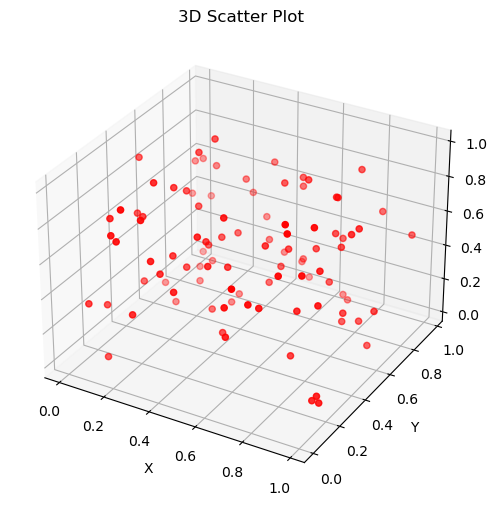

In [52]:
# Sample data
x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='red', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Scatter Plot')
plt.show()